# **Classification exercises with TensorFlow**

## **Importing all possible libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

2024-08-03 20:43:04.276901: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-03 20:43:04.340273: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 20:43:04.376463: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 20:43:04.376559: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-03 20:43:04.418521: I tensorflow/core/platform/cpu_feature_gua

## **Scikit's make_moons()**

The purpose of this exercise is to build a model with accuracy greater than 85% on scikit-learn moon dataset.

In [2]:
X, y = make_moons(n_samples = 2000, random_state = 42)

In [3]:
moons = pd.DataFrame({
    'X1': X[ :, 0],
    'X2': X[ :, 1],
    'label': y
})

In [4]:
moons

,X1,X2,label
0,1.905975,0.076669,1
1,0.444579,0.895740,0
2,0.500000,-0.366025,1
3,-0.956626,0.291319,0
4,0.385330,-0.288785,1
...,...,...,...
1995,0.082408,0.102477,1
1996,0.397808,-0.298352,1
1997,-0.905975,0.423331,0
1998,0.872982,-0.491900,1


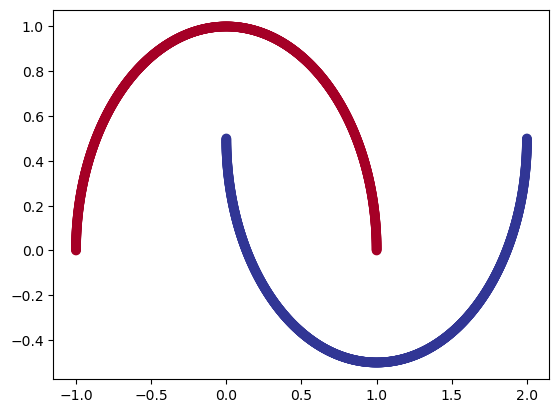

In [5]:
plt.scatter(x = moons.iloc[:, 0], y = moons.iloc[: , 1], c = moons.iloc[: , 2], cmap = 'RdYlBu');

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1500, 2), (500, 2), (1500,), (500,))

### **Create helper functions**

In [8]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    x_in = np.c_[xx.ravel(), yy.ravel()]

    y_pred = model.predict(x = x_in, verbose = 0)

    # if len(y_pred[0]) > 1:
    if model.output_shape[-1] > 1:
        # print('Multiclassification')
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:
        # print('Binary classification')
        # y_pred = y_pred.round().reshape(xx.shape)
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [9]:
results = {}

### **Create intial model**

In [10]:
tf.keras.utils.set_random_seed(42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 4, activation = 'relu'),    
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid'),
])

model_1.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

history_1 = model_1.fit(
    x = X_train,
    y = y_train, 
    epochs = 20,
    validation_split = 0.75
)

2024-08-03 20:43:06.887995: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-03 20:43:07.140499: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-03 20:43:07.140547: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-03 20:43:07.143547: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-03 20:43:07.143582: I external/local_xla/xla/stream_executor

Epoch 1/20


/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-03 20:43:07.445236: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-03 20:43:07.445336: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-03 20:43:07.445351: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2019] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.
2024-08-03 20:43:07.445448: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000

 1/12 ━━━━━━━━━━━━━━━━━━━━ 8s 745ms/step - accuracy: 0.4688 - loss: 0.6269

I0000 00:00:1722710588.745870   53156 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.4657 - loss: 0.6512 - val_accuracy: 0.5031 - val_loss: 0.6170
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4657 - loss: 0.6410 - val_accuracy: 0.4969 - val_loss: 0.6083
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4589 - loss: 0.6311 - val_accuracy: 0.4853 - val_loss: 0.5999
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4508 - loss: 0.6217 - val_accuracy: 0.4729 - val_loss: 0.5917
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4431 - loss: 0.6125 - val_accuracy: 0.4613 - val_loss: 0.5839
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4431 - loss: 0.6036 - val_accuracy: 0.4489 - val_loss: 0.5762
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4278 - loss: 0.5950 - val_accuracy: 0.4400 - val_loss: 0.5688
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4068 - loss: 0.5867 - val_accuracy: 0.4356 - val_loss: 0.5614
Ep

In [11]:
results['model_1'] = model_1.evaluate(x = X_test, y = y_test, verbose = 0)

In [12]:
y_pred_1 = model_1.predict(X_test, verbose = 0)

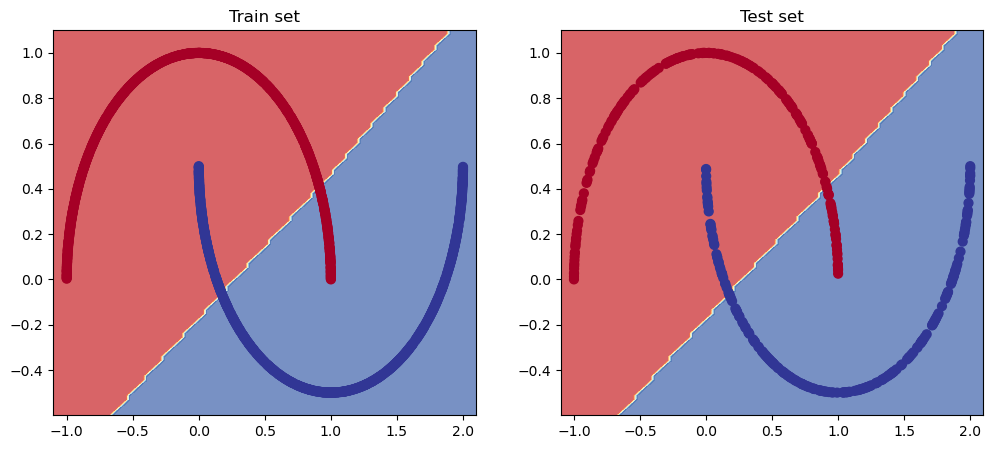

In [13]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_1, X = X_train, y = y_train)
plt.title("Train set")
plt.subplot(1, 2, 2)
plot_decision_boundary(model_1, X = X_test, y = y_test)
plt.title("Test set")
plt.show()

### **Improving the model**

#### **Add more layers**

In [14]:
tf.keras.utils.set_random_seed(42)

model_2  = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 4, activation = 'relu'),
    tf.keras.layers.Dense(units = 4, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid'),
])

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

history_2 = model_2.fit(
    x = X_train, 
    y = y_train,
    epochs = 20,
    validation_split = 0.75
)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8048 - loss: 0.5911 - val_accuracy: 0.8169 - val_loss: 0.5709
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8048 - loss: 0.5813 - val_accuracy: 0.8187 - val_loss: 0.5608
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8048 - loss: 0.5718 - val_accuracy: 0.8187 - val_loss: 0.5511
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8039 - loss: 0.5625 - val_accuracy: 0.8196 - val_loss: 0.5417
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8007 - loss: 0.5534 - val_accuracy: 0.8196 - val_loss: 0.5326
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8007 - loss: 0.5445 - val_accuracy: 0.8187 - val_loss: 0.5237
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8007 - loss: 0.5355 - val_accuracy: 0.8196 - val_loss: 0.5148
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8113 - loss: 0.5266 - val_accuracy: 0.8231 - val_loss

In [15]:
results['model_2'] = model_2.evaluate(x = X_test, y = y_test, verbose = 0)

In [16]:
y_pred_2 = model_2.predict(X_test, verbose = 0)

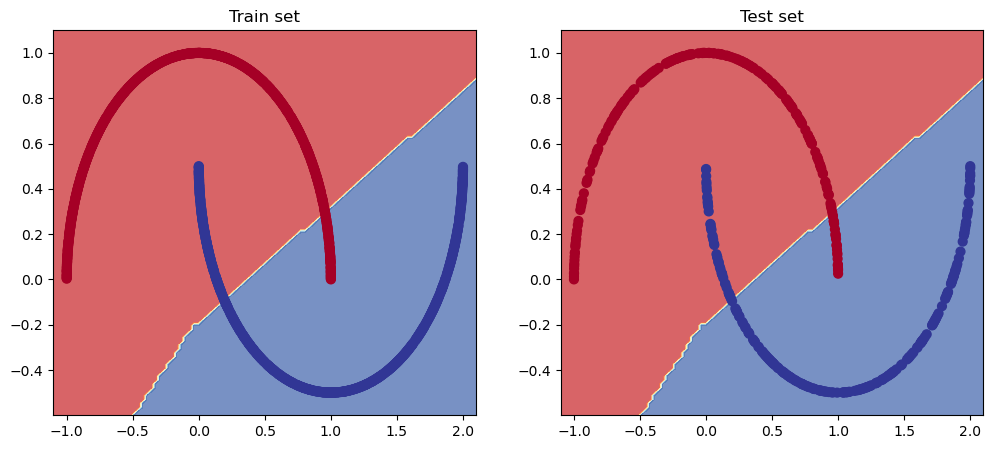

In [17]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_2, X = X_train, y = y_train)
plt.title("Train set")
plt.subplot(1, 2, 2)
plot_decision_boundary(model_2, X = X_test, y = y_test)
plt.title("Test set")
plt.show()

#### **Add more neurons in hidden layers**

In [18]:
tf.keras.utils.set_random_seed(42)

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 8, activation = 'relu'),
    tf.keras.layers.Dense(units = 8, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid'),
])

model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

history_3 = model_3.fit(
    x = X_train,
    y = y_train,
    epochs = 20,
    validation_split = 0.75
)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.2551 - loss: 0.7897 - val_accuracy: 0.3031 - val_loss: 0.7658
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3430 - loss: 0.7519 - val_accuracy: 0.4080 - val_loss: 0.7340
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4364 - loss: 0.7260 - val_accuracy: 0.4631 - val_loss: 0.7105
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4869 - loss: 0.7055 - val_accuracy: 0.4880 - val_loss: 0.6901
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4708 - loss: 0.6873 - val_accuracy: 0.5529 - val_loss: 0.6717
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5284 - loss: 0.6706 - val_accuracy: 0.6053 - val_loss: 0.6547
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5898 - loss: 0.6548 - val_accuracy: 0.7102 - val_loss: 0.6381
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7349 - loss: 0.6391 - val_accuracy: 0.8044 - val_loss

In [19]:
results['model_3'] = model_3.evaluate(x = X_test, y = y_test, verbose = 0)

In [20]:
y_pred_3 = model_3.predict(X_test, verbose = 0)

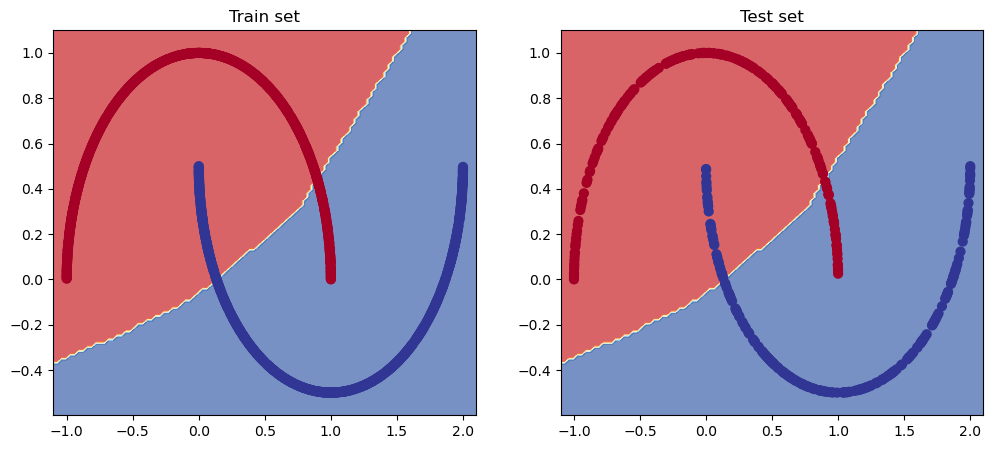

In [21]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_3, X = X_train, y = y_train)
plt.title("Train set")
plt.subplot(1, 2, 2)
plot_decision_boundary(model_3, X = X_test, y = y_test)
plt.title("Test set")
plt.show()

#### **Changing the learning rate value**

In [22]:
tf.keras.utils.set_random_seed(42)

model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 8, activation = 'relu'),
    tf.keras.layers.Dense(units = 8, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid'),
])

model_4.compile(
    loss = tf.keras.losses.BinaryCrossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

history_4 = model_4.fit(
    x = X_train,
    y = y_train,
    epochs = 100,
    validation_split = 0.75,
    callbacks = [lr_scheduler]
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.2537 - loss: 0.7996 - val_accuracy: 0.2284 - val_loss: 0.8068 - learning_rate: 1.0000e-04
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2537 - loss: 0.7951 - val_accuracy: 0.2284 - val_loss: 0.8012 - learning_rate: 1.1220e-04
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2537 - loss: 0.7899 - val_accuracy: 0.2276 - val_loss: 0.7951 - learning_rate: 1.2589e-04
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2537 - loss: 0.7843 - val_accuracy: 0.2276 - val_loss: 0.7885 - learning_rate: 1.4125e-04
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2537 - loss: 0.7783 - val_accuracy: 0.2276 - val_loss: 0.7814 - learning_rate: 1.5849e-04
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2537 - loss: 0.7720 - val_accuracy: 0.2267 - val_loss: 0.7741 - learning_rate: 1.7783e-04
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2590

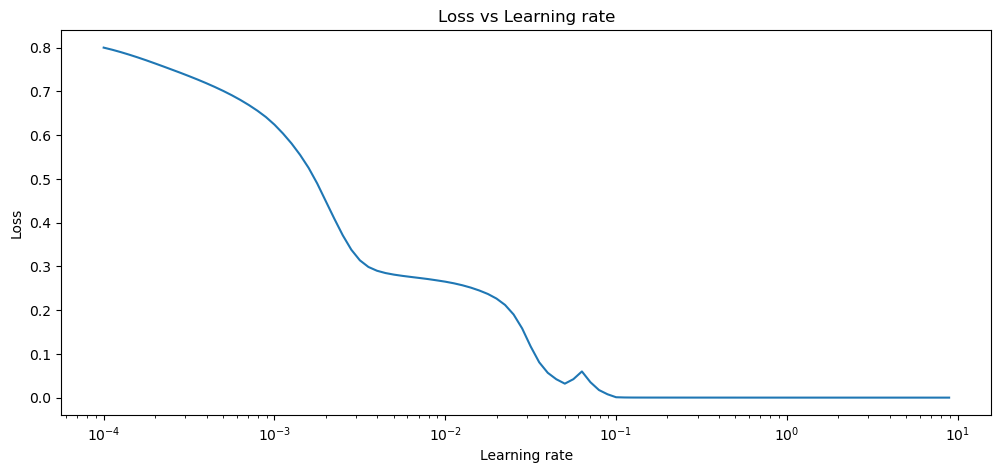

In [23]:
plt.figure(figsize = (12, 5))
plt.semilogx(history_4.history['learning_rate'], history_4.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel('Loss')
plt.title('Loss vs Learning rate')
plt.show()

In [24]:
tf.keras.utils.set_random_seed(42)

model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 8, activation = 'relu'),
    tf.keras.layers.Dense(units = 8, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid'),
])

model_5.compile(
    loss = tf.keras.losses.BinaryCrossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['accuracy']
)

history_5 = model_5.fit(
    x = X_train,
    y = y_train,
    epochs = 40,
    validation_split = 0.75
)

Epoch 1/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.3773 - loss: 0.7308 - val_accuracy: 0.7938 - val_loss: 0.5953
Epoch 2/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7620 - loss: 0.5799 - val_accuracy: 0.8027 - val_loss: 0.4872
Epoch 3/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7842 - loss: 0.4797 - val_accuracy: 0.8436 - val_loss: 0.3875
Epoch 4/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8466 - loss: 0.3757 - val_accuracy: 0.8622 - val_loss: 0.3224
Epoch 5/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8553 - loss: 0.3168 - val_accuracy: 0.8702 - val_loss: 0.2959
Epoch 6/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8593 - loss: 0.3008 - val_accuracy: 0.8756 - val_loss: 0.2858
Epoch 7/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8645 - loss: 0.2950 - val_accuracy: 0.8773 - val_loss: 0.2763
Epoch 8/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8676 - loss: 0.2878 - val_accuracy: 0.8773 - val_loss

In [25]:
results['model_5'] = model_5.evaluate(x = X_test, y = y_test, verbose = 0)

In [26]:
y_pred_5 = model_5.predict(X_test, verbose = 0)

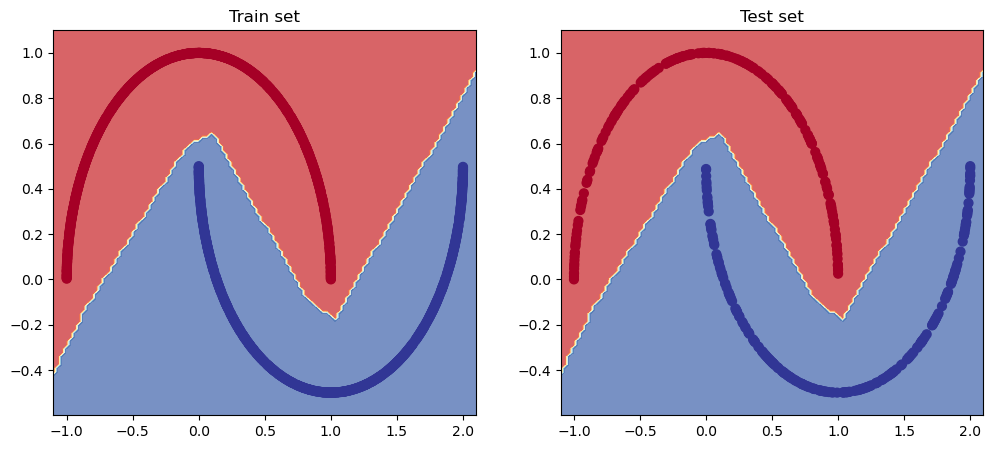

In [27]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_5, X = X_train, y = y_train)
plt.title("Train set")
plt.subplot(1, 2, 2)
plot_decision_boundary(model_5, X = X_test, y = y_test)
plt.title("Test set")
plt.show()

### **Model comparison**

In [28]:
results_df = pd.DataFrame(results.values(), index = results.keys(), columns = ['Loss', 'Accuracy'])

In [29]:
results_df

,Loss,Accuracy
model_1,0.462875,0.850
model_2,0.380706,0.860
model_3,0.421928,0.854
model_5,0.003854,1.000


### **Conclusion**

The achieved accuracy with the model 5 (accuracy = 1) satisfied the goal of this exercise.

## **Fashion-Mnist database**

The purpose of this exercise is to create a model with accuracy greater than 88% on fashion-mnist database.

### **Import some additional libraries**

In [30]:
import os
import gzip
import random
import itertools

### **Create some helper functions**

#### **Reading the dataset**

In [31]:
# The code for this function is taken from:
# https://github.com/zalandoresearch/fashion-mnist/issues/167
# Some minor modifications were made by me

def load_data_fromlocalpath():
    """Loads the Fashion-MNIST dataset from local folder.
    Modified on 2024/07/28.
    I assume that the dataset files are put in fashion_mnist_dataset folder in gzipped format.
    I also asume that this folder contains no other files.
    I also assume that fashion_mnist_dataset folder is in the same folder as current working folder.
    I also asume that user works in *nux environment (Linux, WSL, etc.)

    This function needs the following packages to be loaded:
    os, numpy, gzip
    
    Returns:
      Tuple of numpy arrays: `(x_train, y_train), (x_test, y_test)`.
    """
    
    cwd = os.getcwd() + '/fashion_mnist_dataset'
    
    files = os.listdir(cwd)
    files.sort(reverse = True)
    
    paths = [os.path.join(cwd, f) for f in files]    
    
    with gzip.open(paths[0], 'rb') as train_label_path:
        y_train = np.frombuffer(train_label_path.read(), np.uint8, offset=8)
    
    with gzip.open(paths[1], 'rb') as train_image_path:
        x_train = np.frombuffer(
            buffer = train_image_path.read(),
            dtype = np.uint8,
            offset = 16
        ).reshape(len(y_train), 28, 28)
    
    with gzip.open(paths[2], 'rb') as test_label_path:
        y_test = np.frombuffer(test_label_path.read(), np.uint8, offset=8)
    
    with gzip.open(paths[3], 'rb') as test_image_path:
        x_test = np.frombuffer(
            buffer = test_image_path.read(),
            dtype = np.uint8,
            offset = 16
        ).reshape(len(y_test), 28, 28)
    
    return (x_train, y_train), (x_test, y_test)

#### **Plotting the confusion matrix**

In [32]:
def plot_confusion_matrix(y_test, cm, figsize = None, labels = None):
    '''
    Creates a colorful confusion matrix using seaborn's heatmap

    y_test, 
    cm
    '''
    if not labels:
        labels = np.unique(y_test)
    
    # Counts the values in the y_test vector. y_test needs to be np array
    cm_values = np.unique(y_test, return_counts = True)[1]
    
    # Normalize the valeues in confusion matrix in interval [0, 100] %
    # print(cm / cm_values * 100)
    cm_norm = cm / cm_values * 100
    
    # This 2D array will hold the values that will be shown in the heatmap
    cm_annot = np.zeros(cm.shape, dtype = '<U16')

    # Fills the values for cm_annot array
    for i, j in itertools.product(range(cm.shape[0]), range(cm_norm.shape[1])):
        s = f"{cm[i, j]}\n({cm_norm[i, j]:.2f}%)"
        cm_annot[i, j] = s  
    
    # Creates the heatmap 
    plt.figure(figsize = figsize)
    hm = sns.heatmap(
        data = cm_norm,
        # annot = True,
        # fmt ='.2f',
        annot = cm_annot,
        fmt = '',
        annot_kws = {
            "size": 12
        },
        cmap = 'Blues',
        cbar_kws = {
            # 'use_gridspec': False,
            # 'location':"top",
            'label': 'Percentage (%)'
        },
        linewidths = 0.5,
        linecolor = 'black',
        clip_on=False,
        vmin = 0,
        vmax = 100,
    )
    plt.yticks(rotation=0)
    hm.set_title('Confusion matrix', fontsize = 14)
    hm.set_xlabel('Predicted classes', fontsize = 12)
    hm.set_ylabel('True classes', fontsize = 12)
    # hm.figure.axes[-1].xaxis.label.set_size(14);
    hm.figure.axes[-1].yaxis.label.set_size(12)
    hm.set_yticklabels(labels)
    hm.set_xticklabels(labels)

### **Read the dataset**

In [33]:
(mc_X_train, mc_y_train), (mc_X_test, mc_y_test) = load_data_fromlocalpath()

In [34]:
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot',
]

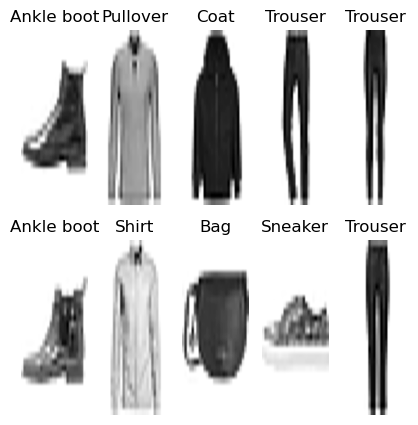

In [35]:
plt.figure(figsize = (5, 5))
for i in range(10):
    rand_index = random.choice(range(len(X_train)))
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(mc_X_train[rand_index], cmap = plt.cm.binary, aspect='auto')
    plt.title(labels[mc_y_train[rand_index]])
    plt.axis(False)

### **Data preparation**

#### **Normalizing _X-train_ and _X_test_ datasets**

In [36]:
mc_X_train_norm = mc_X_train / 255

In [37]:
mc_X_test_norm = mc_X_test / 255

#### **Transform number classes to categories**

In [38]:
mc_y_train_cat = tf.keras.utils.to_categorical(mc_y_train, len(labels))

In [39]:
mc_y_test_cat = tf.keras.utils.to_categorical(mc_y_test, len(labels))

### **Create the model**

In [234]:
tf.keras.utils.set_random_seed(42)

mc_model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(units = 32, activation = 'relu'),
    tf.keras.layers.Dense(units = 32, activation = 'relu'),
    tf.keras.layers.Dense(units = 32, activation = 'relu'),
    tf.keras.layers.Dense(units = 32, activation = 'relu'),
    tf.keras.layers.Dense(units = 32, activation = 'relu'),
    tf.keras.layers.Dense(units = 32, activation = 'relu'),
    tf.keras.layers.Dense(units = 32, activation = 'relu'),
    tf.keras.layers.Dense(units = 10, activation = 'softmax')
    ])

mc_model_1.compile(
    loss = tf.keras.losses.CategoricalCrossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

history_1 = mc_model_1.fit(
    x = mc_X_train_norm,
    y = mc_y_train_cat,
    epochs = 50,
    batch_size = 128,
    validation_data = (
        mc_X_test_norm, 
        mc_y_test_cat
    )
)

/home/oggy/miniconda3/envs/tf-env/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5763 - loss: 1.1523 - val_accuracy: 0.8247 - val_loss: 0.4973
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8337 - loss: 0.4700 - val_accuracy: 0.8462 - val_loss: 0.4436
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8526 - loss: 0.4167 - val_accuracy: 0.8457 - val_loss: 0.4312
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8609 - loss: 0.3848 - val_accuracy: 0.8491 - val_loss: 0.4180
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8660 - loss: 0.3635 - val_accuracy: 0.8482 - val_loss: 0.4186
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8723 - loss: 0.3459 - val_accuracy: 0.8501 - val_loss: 0.4151
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8760 - loss: 0.3347 - val_accuracy: 0.8519 - val_loss: 0.4102
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8806 - loss: 0.3240 - val_accuracy: 0.

### **Evaluate the model**

In [235]:
mc_model_1.evaluate(x = mc_X_test_norm, y = mc_y_test_cat, verbose = 0)

[0.44974321126937866, 0.8723000288009644]

In [236]:
mc_y_test_cat_pred = mc_model_1.predict(x = mc_X_test_norm, verbose = 0)

In [237]:
mc_y_test_cat_pred = mc_y_test_cat_pred.argmax(axis = 1)

In [238]:
mc_cm = metrics.confusion_matrix(y_true = mc_y_test, y_pred = mc_y_test_cat_pred)

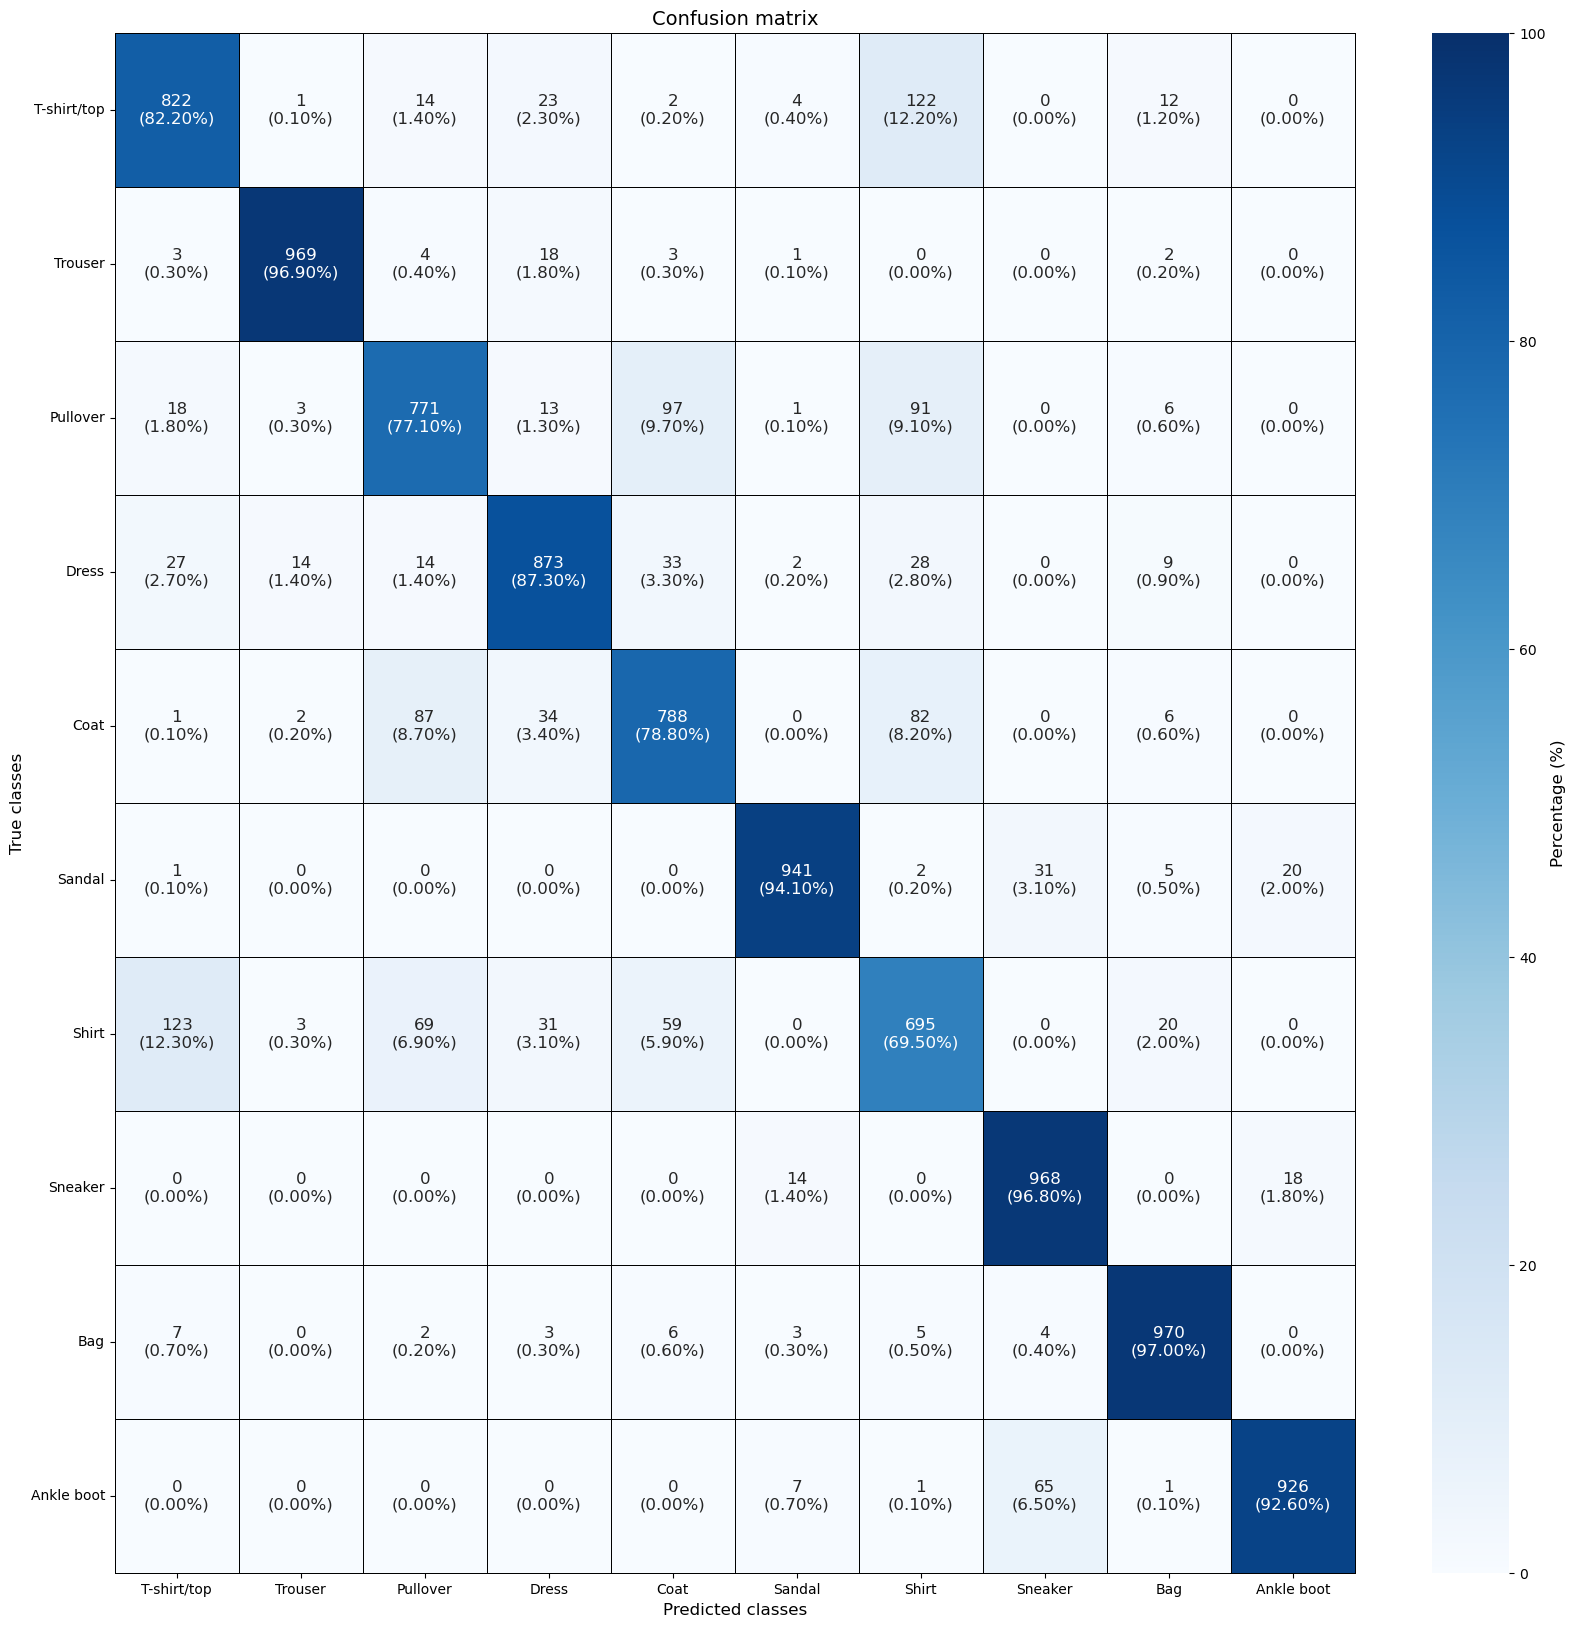

In [239]:
plot_confusion_matrix(mc_y_test, mc_cm, figsize=(20, 20), labels = labels)

In [240]:
print(metrics.classification_report(mc_y_test, mc_y_test_cat_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1000
           1       0.98      0.97      0.97      1000
           2       0.80      0.77      0.79      1000
           3       0.88      0.87      0.88      1000
           4       0.80      0.79      0.79      1000
           5       0.97      0.94      0.95      1000
           6       0.68      0.69      0.69      1000
           7       0.91      0.97      0.94      1000
           8       0.94      0.97      0.96      1000
           9       0.96      0.93      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



### **Conclusion**

The achieved accuracy with this model on the test set (accuracy = 0.8723) doesn't satisfy the goal of this exercise at the moment.